### PROJETO

 - Dataset utilizado: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
 - Tabelas utilizadas do dataset: 'olist_order_items_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_orders_dataset.csv' e 'olist_products_dataset.csv'

#### O que foi feito no pgAdmin 4
 - Importação das tabelas utilizadas para o postgres, seguindo o diagrama fornecido pelo dataset. Algumas colunas que são FOREIGN KEYS nas tabelas utilizadas foram importadas apenas como VARCHAR, já que a importação das tabelas que contém essas colunas como PRIMARY KEYS não foi realizada. (Como por exemplo a coluna costumer_id, que foi importada apenas como VARCHAR)
 - Outro ponto é a coluna 'review_id'. No dataset, ela aparece como uma PRIMARY KEY mas ao tentar impotar, o pgAdmin diz que não foi possivel por conta de valores duplicados. Então, a importação foi feita utilizando VARCHAR para não ter mais erros.
 - Abaixo está o código utilizado no pgAdmin para a importação das tabelas para o postegres, seguindo a imagem abaixo fornecida pelo dataset.
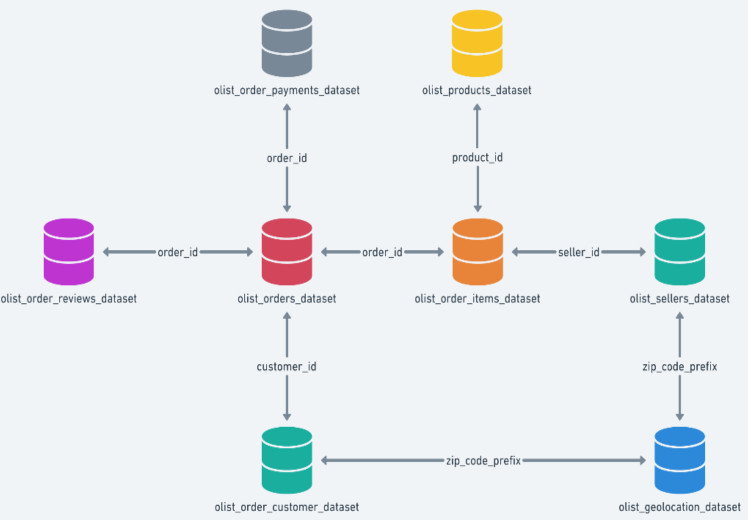

In [ ]:
%%sql

CREATE SCHEMA projeto;

--CRIANDO AS TABELAS
CREATE TABLE projeto.ordens(
	order_id VARCHAR PRIMARY KEY,
	customer_id VARCHAR,
	order_status VARCHAR,
	order_purchase_timestamp TIMESTAMP,
	order_approved_at TIMESTAMP,
	order_delivered_carrier_date TIMESTAMP,
	order_delivered_customer_date TIMESTAMP,
	order_estimated_delivery_date TIMESTAMP
);

SELECT * FROM projeto.ordens;

CREATE TABLE projeto.ordens_itens(
	order_id VARCHAR,
	order_item_id INTEGER, --Na verdade não é uma id, e sim a quantidade de determinado produto em um pedido
	product_id VARCHAR,
	seller_id VARCHAR,
	shipping_limit_date TIMESTAMP,
	price NUMERIC,
	freight_value NUMERIC,
	FOREIGN KEY (order_id) REFERENCES projeto.ordens (order_id),
	FOREIGN KEY (product_id) REFERENCES projeto.produtos (product_id)
);

SELECT * FROM projeto.ordens_itens;

CREATE TABLE projeto.produtos(
	product_id VARCHAR PRIMARY KEY,
	product_category_name VARCHAR,
	product_name_lenght INTEGER,
	product_description_lenght INTEGER,
	product_photos_qty INTEGER,
	product_weight_g INTEGER,
	product_lenght_cm INTEGER,
	product_height_cm INTEGER,
	product_width_cm INTEGER
);

SELECT * FROM projeto.produtos

CREATE TABLE projeto.reviews(
	review_id VARCHAR,
	order_id VARCHAR,
	reviews_score INTEGER,
	review_comment_title VARCHAR,
	review_comment_message VARCHAR,
	review_creation_date TIMESTAMP,
	review_answer_timestamp TIMESTAMP,
	FOREIGN KEY (order_id) REFERENCES projeto.ordens (order_id)
);

SELECT * FROM projeto.reviews

### Conectando ao pgAdmin

In [1]:
import pandas as pd
import psycopg2

In [2]:
conn = psycopg2.connect(
    host = "localhost", 
    database = "postgres",  
    user = "postgres", 
    password = ""
)

### Análise descritiva de cada tabela
 - Para consumir espaço, cada célula é uma análise completa de cada tabela. Para visualizar os resultados de cada pergunta, basta descomentar a linha desejada e comentar as outras duas. 

In [4]:
#Análise da tabela ordens
query_tipagem_colunas = '''
SELECT
	column_name as "Nome da Coluna",
	data_type as "Tipagem da Coluna",
	table_schema as "Schema Pertencente"
FROM 
	information_schema.columns
WHERE table_name = 'ordens';
'''
query_quantidade_nulls = '''
SELECT 
    COUNT(CASE WHEN order_id IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 1",
    COUNT(CASE WHEN customer_id IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 2",
    COUNT(CASE WHEN order_status IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 3",
    COUNT(CASE WHEN order_purchase_timestamp IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 4",
	COUNT(CASE WHEN order_approved_at IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 5",
	COUNT(CASE WHEN order_delivered_carrier_date IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 6",
	COUNT(CASE WHEN order_delivered_customer_date IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 7",
	COUNT(CASE WHEN order_estimated_delivery_date IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 8"
FROM 
    projeto.ordens;
'''
query_valores_unicos = '''
SELECT 
	COUNT(DISTINCT order_id) as "Valores Únicos - Coluna 1",
	COUNT(DISTINCT customer_id) as "Valores Únicos - Coluna 2",
	COUNT(DISTINCT order_status) as "Valores Únicos - Coluna 3",
	COUNT(DISTINCT order_purchase_timestamp) as "Valores Únicos - Coluna 4",
	COUNT(DISTINCT order_approved_at) as "Valores Únicos - Coluna 5",
	COUNT(DISTINCT order_delivered_carrier_date) as "Valores Únicos - Coluna 6",
	COUNT(DISTINCT order_delivered_customer_date) as "Valores Únicos - Coluna 7",
	COUNT(DISTINCT order_estimated_delivery_date) as "Valores Únicos - Coluna 8"
FROM projeto.ordens;
'''
df_tipagem = pd.read_sql_query(query_tipagem_colunas, con = conn)
df_nulls = pd.read_sql_query(query_quantidade_nulls, con = conn)
df_unicos = pd.read_sql_query(query_valores_unicos, con = conn)

df_tipagem
#df_nulls
#df_unicos

,Nome da Coluna,Tipagem da Coluna,Schema Pertencente
0,order_estimated_delivery_date,timestamp without time zone,projeto
1,order_approved_at,timestamp without time zone,projeto
2,order_delivered_carrier_date,timestamp without time zone,projeto
3,order_delivered_customer_date,timestamp without time zone,projeto
4,order_purchase_timestamp,timestamp without time zone,projeto
5,customer_id,character varying,projeto
6,order_status,character varying,projeto
7,order_id,character varying,projeto


In [5]:
#Análise da tabela ordens_itens
query_tipagem_colunas = '''
SELECT
	column_name as "Nome da Coluna",
	data_type as "Tipagem da Coluna",
	table_schema as "Schema Pertencente"
FROM 
	information_schema.columns
WHERE table_name = 'ordens_itens';
'''
query_quantidade_nulls = '''
SELECT 
    COUNT(CASE WHEN order_id IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 1",
    COUNT(CASE WHEN order_item_id IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 2",
    COUNT(CASE WHEN product_id IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 3",
    COUNT(CASE WHEN seller_id IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 4",
	COUNT(CASE WHEN shipping_limit_date IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 5",
	COUNT(CASE WHEN price IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 6",
	COUNT(CASE WHEN freight_value IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 7"
FROM 
    projeto.ordens_itens;
'''
query_valores_unicos = '''
SELECT 
	COUNT(DISTINCT order_id) as "Valores Únicos - Coluna 1",
	COUNT(DISTINCT order_item_id) as "Valores Únicos - Coluna 2",
	COUNT(DISTINCT product_id) as "Valores Únicos - Coluna 3",
	COUNT(DISTINCT seller_id) as "Valores Únicos - Coluna 4",
	COUNT(DISTINCT shipping_limit_date) as "Valores Únicos - Coluna 5",
	COUNT(DISTINCT price) as "Valores Únicos - Coluna 6",
	COUNT(DISTINCT freight_value) as "Valores Únicos - Coluna 7"
FROM projeto.ordens_itens;
'''
df_tipagem = pd.read_sql_query(query_tipagem_colunas, con = conn)
df_nulls = pd.read_sql_query(query_quantidade_nulls, con = conn)
df_unicos = pd.read_sql_query(query_valores_unicos, con = conn)

df_tipagem
#df_nulls
#df_unicos

,Nome da Coluna,Tipagem da Coluna,Schema Pertencente
0,shipping_limit_date,timestamp without time zone,projeto
1,price,numeric,projeto
2,freight_value,numeric,projeto
3,order_item_id,integer,projeto
4,seller_id,character varying,projeto
5,product_id,character varying,projeto
6,order_id,character varying,projeto


In [6]:
#Análise da tabela produtos
query_tipagem_colunas = '''
SELECT
	column_name as "Nome da Coluna",
	data_type as "Tipagem da Coluna",
	table_schema as "Schema Pertencente"
FROM 
	information_schema.columns
WHERE table_name = 'produtos';
'''
query_quantidade_nulls = '''
SELECT 
    COUNT(CASE WHEN product_id IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 1",
    COUNT(CASE WHEN product_category_name IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 2",
    COUNT(CASE WHEN product_name_lenght IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 3",
    COUNT(CASE WHEN product_description_lenght IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 4",
	COUNT(CASE WHEN product_photos_qty IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 5",
	COUNT(CASE WHEN product_weight_g IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 6",
	COUNT(CASE WHEN product_lenght_cm IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 7",
	COUNT(CASE WHEN product_height_cm IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 8",
	COUNT(CASE WHEN product_width_cm IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 9"
FROM 
    projeto.produtos;
'''
query_valores_unicos = '''
SELECT 
	COUNT(DISTINCT product_id) as "Valores Únicos - Coluna 1",
	COUNT(DISTINCT product_category_name) as "Valores Únicos - Coluna 2",
	COUNT(DISTINCT product_name_lenght) as "Valores Únicos - Coluna 3",
	COUNT(DISTINCT product_description_lenght) as "Valores Únicos - Coluna 4",
	COUNT(DISTINCT product_photos_qty) as "Valores Únicos - Coluna 5",
	COUNT(DISTINCT product_weight_g) as "Valores Únicos - Coluna 6",
	COUNT(DISTINCT product_lenght_cm) as "Valores Únicos - Coluna 7",
	COUNT(DISTINCT product_height_cm) as "Valores Únicos - Coluna 8",
	COUNT(DISTINCT product_width_cm) as "Valores Únicos - Coluna 9"
FROM projeto.produtos;
'''
df_tipagem = pd.read_sql_query(query_tipagem_colunas, con = conn)
df_nulls = pd.read_sql_query(query_quantidade_nulls, con = conn)
df_unicos = pd.read_sql_query(query_valores_unicos, con = conn)

df_tipagem
#df_nulls
#df_unicos

,Nome da Coluna,Tipagem da Coluna,Schema Pertencente
0,product_width_cm,integer,projeto
1,product_lenght_cm,integer,projeto
2,product_height_cm,integer,projeto
3,product_name_lenght,integer,projeto
4,product_description_lenght,integer,projeto
5,product_photos_qty,integer,projeto
6,product_weight_g,integer,projeto
7,product_category_name,character varying,projeto
8,product_id,character varying,projeto


In [7]:
#Análise da tabela reviews
query_tipagem_colunas = '''
SELECT
	column_name as "Nome da Coluna",
	data_type as "Tipagem da Coluna",
	table_schema as "Schema Pertencente"
FROM 
	information_schema.columns
WHERE table_name = 'reviews';
'''
query_quantidade_nulls = '''
SELECT 
    COUNT(CASE WHEN review_id IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 1",
    COUNT(CASE WHEN order_id IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 2",
    COUNT(CASE WHEN reviews_score IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 3",
    COUNT(CASE WHEN review_comment_title IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 4",
	COUNT(CASE WHEN review_comment_message IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 5",
	COUNT(CASE WHEN review_creation_date IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 6",
	COUNT(CASE WHEN review_answer_timestamp IS NULL THEN 1 END) AS "Quantidade Nulos - Coluna 7"
FROM 
    projeto.reviews;
'''
query_valores_unicos = '''
SELECT 
	COUNT(DISTINCT review_id) as "Valores Únicos - Coluna 1",
	COUNT(DISTINCT order_id) as "Valores Únicos - Coluna 2",
	COUNT(DISTINCT reviews_score) as "Valores Únicos - Coluna 3",
	COUNT(DISTINCT review_comment_title) as "Valores Únicos - Coluna 4",
	COUNT(DISTINCT review_comment_message) as "Valores Únicos - Coluna 5",
	COUNT(DISTINCT review_creation_date) as "Valores Únicos - Coluna 6",
	COUNT(DISTINCT review_answer_timestamp) as "Valores Únicos - Coluna 7"
FROM projeto.reviews;
'''
df_tipagem = pd.read_sql_query(query_tipagem_colunas, con = conn)
df_nulls = pd.read_sql_query(query_quantidade_nulls, con = conn)
df_unicos = pd.read_sql_query(query_valores_unicos, con = conn)

df_tipagem
#df_nulls
#df_unicos

,Nome da Coluna,Tipagem da Coluna,Schema Pertencente
0,reviews_score,integer,projeto
1,review_creation_date,timestamp without time zone,projeto
2,review_answer_timestamp,timestamp without time zone,projeto
3,review_comment_message,character varying,projeto
4,review_comment_title,character varying,projeto
5,order_id,character varying,projeto
6,review_id,character varying,projeto


### Questões

In [14]:
#Questão 1: Quais categorias de produtos são as mais vendidas?
query = '''
SELECT 
	p.product_category_name AS "Categoria", 
	COUNT(*) AS "Vendas Totais" 
FROM 
	projeto.ordens_itens AS oi
INNER JOIN projeto.produtos AS p ON oi.product_id = p.product_id 
GROUP BY "Categoria"
ORDER BY "Vendas Totais" DESC 
LIMIT 10;
'''
df = pd.read_sql_query(query, con = conn)
df

,Categoria,Vendas Totais
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
5,utilidades_domesticas,6964
6,relogios_presentes,5991
7,telefonia,4545
8,ferramentas_jardim,4347
9,automotivo,4235


In [22]:
#Questão 2: Quais os produtos mais vendidos em termos de quantidade?
query = '''
SELECT 
    oi.product_id AS "Produto", 
    p.product_category_name AS "Categoria", 
    SUM(oi.order_item_id) as "Vendas Totais"
FROM 
	projeto.ordens_itens AS oi
INNER JOIN projeto.produtos AS p ON oi.product_id = p.product_id
GROUP BY "Produto", "Categoria"
ORDER BY "Vendas Totais" DESC
LIMIT 10;
'''
df = pd.read_sql_query(query, con = conn)
df

,Produto,Categoria,Vendas Totais
0,422879e10f46682990de24d770e7f83d,ferramentas_jardim,793
1,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,640
2,368c6c730842d78016ad823897a372db,ferramentas_jardim,551
3,53759a2ecddad2bb87a079a1f1519f73,ferramentas_jardim,545
4,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,542
5,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,534
6,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,369
7,a62e25e09e05e6faf31d90c6ec1aa3d1,relogios_presentes,367
8,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,359
9,3dd2a17168ec895c781a9191c1e95ad7,informatica_acessorios,306


In [32]:
#Questão 3: Dentre todos os pedidos realizados, qual porcentagem deles foram avaliados com título e comentário na review?
query = '''
SELECT (COUNT(r.review_comment_title) * 100.0 / (SELECT COUNT(order_id) FROM projeto.ordens)) AS "Reviews Completas (%)"
FROM projeto.reviews AS r
WHERE review_comment_title IS NOT NULL AND review_comment_message IS NOT NULL;
'''
df = pd.read_sql_query(query, con = conn)
df

,Reviews Completas (%)
0,9.894309


In [13]:
#Questão 4: Quais os vendedores com as maiores quantidades de pedidos?
query = '''
SELECT oi.seller_id AS "Vendedor", COUNT(order_id) AS "N° Pedidos"
FROM projeto.ordens_itens AS oi
GROUP BY "Vendedor"
ORDER BY "N° Pedidos" DESC
LIMIT 10
'''
df = pd.read_sql_query(query, con = conn)
df


,Vendedor,N° Pedidos
0,6560211a19b47992c3666cc44a7e94c0,2033
1,4a3ca9315b744ce9f8e9374361493884,1987
2,1f50f920176fa81dab994f9023523100,1931
3,cc419e0650a3c5ba77189a1882b7556a,1775
4,da8622b14eb17ae2831f4ac5b9dab84a,1551
5,955fee9216a65b617aa5c0531780ce60,1499
6,1025f0e2d44d7041d6cf58b6550e0bfa,1428
7,7c67e1448b00f6e969d365cea6b010ab,1364
8,ea8482cd71df3c1969d7b9473ff13abc,1203
9,7a67c85e85bb2ce8582c35f2203ad736,1171


In [31]:
#Questão 5: Quais vendedores já atrasaram suas entregas e qual a soma total de dias de atraso dentre todos os pedidos do vendedor?
query = '''
SELECT 
    oi.seller_id AS "Vendedor", SUM(DATE_PART('day', o.order_delivered_customer_date - o.order_estimated_delivery_date)) as "Soma Dias de Atraso"
FROM 
    projeto.ordens_itens AS oi
INNER JOIN projeto.ordens AS o ON oi.order_id = o.order_id
WHERE order_estimated_delivery_date < order_delivered_customer_date AND DATE_PART('day', o.order_delivered_customer_date - o.order_estimated_delivery_date) != 0
GROUP BY "Vendedor"
ORDER BY "Soma Dias de Atraso" DESC;
'''
df = pd.read_sql_query(query, con = conn)
df

,Vendedor,Soma Dias de Atraso
0,4a3ca9315b744ce9f8e9374361493884,2088.0
1,1f50f920176fa81dab994f9023523100,1570.0
2,7c67e1448b00f6e969d365cea6b010ab,1308.0
3,4869f7a5dfa277a7dca6462dcf3b52b2,1118.0
4,da8622b14eb17ae2831f4ac5b9dab84a,1074.0
...,...,...
1269,081acf3de680d554796c9cf041be7bc2,1.0
1270,c8660dcf9ba70575f45d80fe28c27713,1.0
1271,d8d9567d0bfb0bc7eb845a205ba42657,1.0
1272,cea729054f157f5870bdd321a958d994,1.0


In [12]:
#Questão 6: Qual a categoria com a menor avaliação?
query = """
SELECT 
    AVG(r.reviews_score) nota_media, p.product_category_name AS categoria
FROM 
    projeto.ordens_itens as i 
LEFT JOIN projeto.reviews as r on i.order_id = r.order_id
LEFT JOIN projeto.produtos as p on i.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY AVG(r.reviews_score)
LIMIT 1;
"""
df = pd.read_sql_query(query, con = conn)
df

,nota_media,categoria
0,2.5,seguros_e_servicos


In [13]:
#Questão 7: Quantas reviews foram avaliadas com menos de 10 caracteres de texto?
query = """
SELECT 
    COUNT(review_comment_message) AS "Quantidades de reviews com menos de 10 caracteres"
FROM 
    projeto.reviews
WHERE LENGTH(review_comment_message) < 10;
"""
df = pd.read_sql_query(query, con = conn)
df

,Quantidades de reviews com menos de 10 caracteres
0,2954


In [14]:
#Questão 8: Quantas reviews não foram comentadas?
query = """
SELECT 
    COUNT(CASE WHEN review_comment_message IS NULL THEN 1 END) as "Quantidade de Reviews Nulas"
FROM 
    projeto.reviews;
"""
df = pd.read_sql_query(query, con = conn)
df

,Quantidade de Reviews Nulas
0,58247


In [15]:
#Questão 9: Quais as 3 maiores reviews?
query = """
SELECT 
    review_comment_message AS "Avaliacao", LENGTH(review_comment_message) AS "Tamanho Avaliacao"
FROM 
    projeto.reviews
WHERE review_comment_message IS NOT NULL
ORDER BY "Tamanho Avaliacao" DESC
LIMIT 3;
"""
df = pd.read_sql_query(query, con = conn)
df

,Avaliacao,Tamanho Avaliacao
0,"NÃO RECEBI O PRODUTO, O PRODUTO CONSTA COMO EN...",208
1,Adquiri 2 mochilas pelo site lannister de e pa...,207
2,Comprei o produto confiando nas lojas lanniste...,206


In [16]:
#Questão 10: Quantos pedidos atrasaram na entrega ao cliente?
query = """
SELECT 
    COUNT(AGE(order_estimated_delivery_date, order_delivered_customer_date)) as "Entregas atrasadas"
FROM 
    projeto.ordens
WHERE order_estimated_delivery_date < order_delivered_customer_date;
"""
df = pd.read_sql_query(query, con = conn)
df

,Entregas atrasadas
0,7827


In [30]:
#Questão 11: Em quantas categorias cada vendedor possui produtos?
query = """
SELECT 
    i.seller_id AS "Vendedor", COUNT(DISTINCT(p.product_category_name)) AS "Quantidade de categorias com produtos"
FROM 
    projeto.ordens_itens as i
LEFT JOIN projeto.produtos as p on p.product_id = i.product_id
GROUP BY i.seller_id 
ORDER BY "Quantidade de categorias com produtos" DESC;
"""
df = pd.read_sql_query(query, con = conn)
df

,Vendedor,Quantidade de categorias com produtos
0,b2ba3715d723d245138f291a6fe42594,27
1,4e922959ae960d389249c378d1c939f5,23
2,955fee9216a65b617aa5c0531780ce60,23
3,1da3aeb70d7989d1e6d9b0e887f97c23,21
4,f8db351d8c4c4c22c6835c19a46f01b0,19
...,...,...
3090,3a79f35a2344ede41af21267f61d5ec6,0
3091,5cf1ec37aea089f45110c70653a166ab,0
3092,7bb8fac2913a6064ec412e583c6d8b4d,0
3093,7b3f6ce5c6c22e9b96e7581ebf0df6e1,0
